In [1]:
# basic_example.ipynb
# Authors: Stephan Meighen-Berger
# Basic script to show off what nuisance can do

In [2]:
# imports
import sys
sys.path.append("../")
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial import ConvexHull
from matplotlib.path import Path
from scipy.spatial import Delaunay
from tqdm.notebook import tqdm

In [3]:
# Module import
from opaca import Opaca, config

In [4]:
# NFW
config['halo']['name'] = 'nfw'
opaca_nfw = Opaca()

INFO: Starting
INFO: Welcome to Opaca (opaca coronae). I'm here to help
INFO: Please note more information on functions can be fetched by using .__doc__!
INFO: Building the halo object
INFO: Builing an NFW halo
INFO: Please cite the original paper when using this profile: arXiv:astro-ph/9508025
INFO: Done
INFO: Setup took -0 seconds


In [5]:
# Burkert
config['halo']['name'] = 'burkert'
opaca_bur = Opaca()

INFO: Starting
INFO: Starting
INFO: Welcome to Opaca (opaca coronae). I'm here to help
INFO: Welcome to Opaca (opaca coronae). I'm here to help
INFO: Please note more information on functions can be fetched by using .__doc__!
INFO: Please note more information on functions can be fetched by using .__doc__!
INFO: Building the halo object
INFO: Building the halo object
INFO: Builing an Burkert halo
INFO: Builing an Burkert halo
INFO: Please cite the original paper when using this profile: arXiv:astro-ph/9504041
INFO: Please cite the original paper when using this profile: arXiv:astro-ph/9504041
INFO: Done
INFO: Done
INFO: Setup took -0 seconds
INFO: Setup took -0 seconds


In [6]:
# Fetching more documentation
print(opaca_nfw.halo.rho.__doc__)

 basic burkert density function

    Parameters
    ----------
    r: np.ndarray / float
        The radius to evaluate at. Units should be in kpc
    rs: float
        The scale radius, this will be set with the config file
    rhos: float
        The scale density, this will be set with the config file

    Returns
    -------
    dens: np.ndarray / float
        The resulting density in the shape of the input.
        Units are 10**7 M_sol / kpc**3

    Notes
    -----
    The analytical form of the function is:
    .. math::
    \rho(r) = \frac{\rho_0 r^3_0}{(r + r_0)(r^2 + r_0^2)}
    


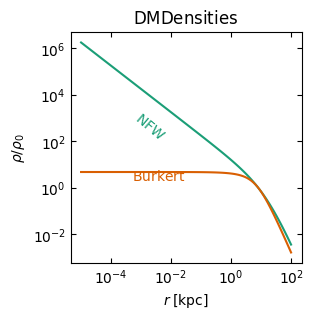

In [7]:
# Densities
# ------------------------------------------------------------------------------
# Plotting
fig, ax = plt.subplots(1, 1, figsize=(3.,3.))
color_spec = [
    '#1b9e77',
    '#d95f02',
    '#7570b3',
    '#e7298a',
    '#66a61e'
]
# -----------------------------------------------------------------------------
radii = np.logspace(-5, 2, 101)
ax.plot(radii, opaca_nfw.halo.rho(radii) / opaca_nfw.halo.rho(config["halo"]["local distance"]), color=color_spec[0])
ax.plot(radii, opaca_bur.halo.rho(radii) / opaca_bur.halo.rho(config["halo"]["local distance"]), color=color_spec[1])
# ------------------------------------------------------------------------------
# Axis
ax.tick_params(axis='both', which='both', direction='in', right=True, top=True)
ax.set_xscale('log')
ax.set_yscale('log')
# ax.set_ylim(1e3, 1e10)
# ax.set_xlim(1e-3, 2e1)
# ax.set_xticks(ticks=np.arange(0., 1., 0.1), minor=True)
# ax.set_yticks(ticks=range(200)[::5], minor=True)
# ------------------------------------------------------------------------------
# Descriptions
ax.set_ylabel(r"$\rho / \rho_0$")
ax.set_xlabel(r'$r\;\mathrm{[kpc]}$')
ax.set_title(r'$\mathrm{DM Densities}$')
ax.text(5e-4, 1.2e2, r'$\mathrm{NFW}$', color=color_spec[0], rotation=-40)
ax.text(5e-4, 2e0, r'$\mathrm{Burkert}$', color=color_spec[1])
# custom_lines = [Line2D([0], [0], color='k', ls='-'),
#                 Line2D([0], [0], color='k', ls='--')]
# ax.legend(custom_lines, [r'$\mathrm{Reconstructed}$', r'$\mathrm{Injected}$'], frameon=False, bbox_to_anchor=(0.892, 0.25))
# ------------------------------------------------------------------------------
# Additional stuff
ax.set_box_aspect(1)
# fig.savefig('neutrino_fluxes_reco.pgf', bbox_inches='tight', dpi=500)

In [8]:
def r_obs_point(x: np.ndarray, psi: float, R0=8.127) -> np.ndarray:
    """ recast of the radius

    Parameters
    ----------
    x: np.ndarray
        The distance between observer and the desired point
    psi: float
        The angles of interest (between point and GC)
    R0: float
        The scale radius (our distance)

    Returns
    -------
    r: np.ndarray
        The equilent distance in the new coordinate system
    """
    r = np.sqrt(
        R0**2 + x**2 - 2 * x * R0 * np.cos(psi)
    )
    return np.nan_to_num(r)

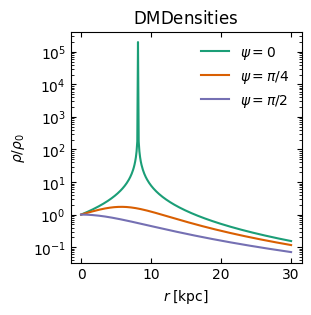

In [9]:
# Densities
# ------------------------------------------------------------------------------
# Plotting
fig, ax = plt.subplots(1, 1, figsize=(3.,3.))
color_spec = [
    '#1b9e77',
    '#d95f02',
    '#7570b3',
    '#e7298a',
    '#66a61e'
]
# -----------------------------------------------------------------------------
rhalo = np.linspace(0, 30, 300)
psi = 0
ax.plot(
    rhalo,
    opaca_nfw.halo.rho(
        r_obs_point(rhalo, psi)
    ) / opaca_nfw.halo.rho(config["halo"]["local distance"]),
    color=color_spec[0], label=r'$\psi = 0$'
)
psi = np.pi / 4
ax.plot(
    rhalo,
    opaca_nfw.halo.rho(
        r_obs_point(rhalo, psi)
    ) / opaca_nfw.halo.rho(config["halo"]["local distance"]),
    color=color_spec[1], label=r'$\psi = \pi / 4$'
)
psi = np.pi / 2
ax.plot(
    rhalo,
    opaca_nfw.halo.rho(
        r_obs_point(rhalo, psi)
    ) / opaca_nfw.halo.rho(config["halo"]["local distance"]),
    color=color_spec[2], label=r'$\psi = \pi / 2$'
)
# ------------------------------------------------------------------------------
# Axis
ax.tick_params(axis='both', which='both', direction='in', right=True, top=True)
ax.set_xscale('linear')
ax.set_yscale('log')
# ax.set_ylim(1e3, 1e10)
# ax.set_xlim(1e-3, 2e1)
# ax.set_xticks(ticks=np.arange(0., 1., 0.1), minor=True)
# ax.set_yticks(ticks=range(200)[::5], minor=True)
# ------------------------------------------------------------------------------
# Descriptions
ax.set_ylabel(r"$\rho / \rho_0$")
ax.set_xlabel(r'$r\;\mathrm{[kpc]}$')
ax.set_title(r'$\mathrm{DM Densities}$')
# ax.text(5e-4, 1.2e2, r'$\mathrm{NFW}$', color=color_spec[0], rotation=-40)
# ax.text(5e-4, 2e0, r'$\mathrm{Burkert}$', color=color_spec[1])
# custom_lines = [Line2D([0], [0], color='k', ls='-'),
#                 Line2D([0], [0], color='k', ls='--')]
# ax.legend(custom_lines, [r'$\mathrm{Reconstructed}$', r'$\mathrm{Injected}$'], frameon=False, bbox_to_anchor=(0.892, 0.25))
ax.legend(frameon=False)
# ------------------------------------------------------------------------------
# Additional stuff
ax.set_box_aspect(1)
# fig.savefig('neutrino_fluxes_reco.pgf', bbox_inches='tight', dpi=500)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


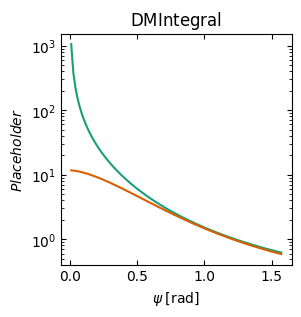

In [10]:
# Densities
# ------------------------------------------------------------------------------
# Plotting
fig, ax = plt.subplots(1, 1, figsize=(3.,3.))
color_spec = [
    '#1b9e77',
    '#d95f02',
    '#7570b3',
    '#e7298a',
    '#66a61e'
]
# -----------------------------------------------------------------------------
rhalo = np.linspace(1e-2, 30, 500)
psi_arr = np.linspace(1e-2, np.pi / 2, 100)
int_arr = np.array([
    np.trapz(opaca_nfw.halo.rho(
        r_obs_point(rhalo, psi)
    )**2, x=rhalo)
for psi in psi_arr])
ax.plot(
    psi_arr,
    int_arr,
    color=color_spec[0],
)
int_arr = np.array([
    np.trapz(opaca_bur.halo.rho(
        r_obs_point(rhalo, psi)
    )**2, x=rhalo)
for psi in psi_arr])
ax.plot(
    psi_arr,
    int_arr,
    color=color_spec[1],
)
# ------------------------------------------------------------------------------
# Axis
ax.tick_params(axis='both', which='both', direction='in', right=True, top=True)
ax.set_xscale('linear')
ax.set_yscale('log')
# ax.set_ylim(1e3, 1e10)
# ax.set_xlim(1e-3, 2e1)
# ax.set_xticks(ticks=np.arange(0., 1., 0.1), minor=True)
# ax.set_yticks(ticks=range(200)[::5], minor=True)
# ------------------------------------------------------------------------------
# Descriptions
ax.set_ylabel(r"$Placeholder$")
ax.set_xlabel(r'$\psi\;\mathrm{[rad]}$')
ax.set_title(r'$\mathrm{DM Integral}$')
# ax.text(5e-4, 1.2e2, r'$\mathrm{NFW}$', color=color_spec[0], rotation=-40)
# ax.text(5e-4, 2e0, r'$\mathrm{Burkert}$', color=color_spec[1])
# custom_lines = [Line2D([0], [0], color='k', ls='-'),
#                 Line2D([0], [0], color='k', ls='--')]
# ax.legend(custom_lines, [r'$\mathrm{Reconstructed}$', r'$\mathrm{Injected}$'], frameon=False, bbox_to_anchor=(0.892, 0.25))
ax.legend(frameon=False)
# ------------------------------------------------------------------------------
# Additional stuff
ax.set_box_aspect(1)
# fig.savefig('neutrino_fluxes_reco.pgf', bbox_inches='tight', dpi=500)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


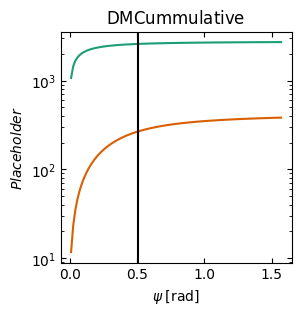

In [11]:
# Densities
# ------------------------------------------------------------------------------
# Plotting
fig, ax = plt.subplots(1, 1, figsize=(3.,3.))
color_spec = [
    '#1b9e77',
    '#d95f02',
    '#7570b3',
    '#e7298a',
    '#66a61e'
]
# -----------------------------------------------------------------------------
rhalo = np.linspace(0, 30, 300)
psi_arr = np.linspace(1e-2, np.pi / 2, 100)
int_arr = np.array([
    np.trapz(opaca_nfw.halo.rho(
        r_obs_point(rhalo, psi)
    )**2, x=rhalo)
for psi in psi_arr])
ax.plot(
    psi_arr,
    np.cumsum(int_arr),
    color=color_spec[0],
)
int_arr = np.array([
    np.trapz(opaca_bur.halo.rho(
        r_obs_point(rhalo, psi)
    )**2, x=rhalo)
for psi in psi_arr])
ax.plot(
    psi_arr,
    np.cumsum(int_arr),
    color=color_spec[1],
)
# ------------------------------------------------------------------------------
# Additional
ax.axvline(np.deg2rad(28.936175), 0, 1, color='k')
# ------------------------------------------------------------------------------
# Axis
ax.tick_params(axis='both', which='both', direction='in', right=True, top=True)
ax.set_xscale('linear')
ax.set_yscale('log')
# ax.set_ylim(1e3, 1e10)
# ax.set_xlim(1e-3, 2e1)
# ax.set_xticks(ticks=np.arange(0., 1., 0.1), minor=True)
# ax.set_yticks(ticks=range(200)[::5], minor=True)
# ------------------------------------------------------------------------------
# Descriptions
ax.set_ylabel(r"$Placeholder$")
ax.set_xlabel(r'$\psi\;\mathrm{[rad]}$')
ax.set_title(r'$\mathrm{DM Cummulative}$')
# ax.text(5e-4, 1.2e2, r'$\mathrm{NFW}$', color=color_spec[0], rotation=-40)
# ax.text(5e-4, 2e0, r'$\mathrm{Burkert}$', color=color_spec[1])
# custom_lines = [Line2D([0], [0], color='k', ls='-'),
#                 Line2D([0], [0], color='k', ls='--')]
# ax.legend(custom_lines, [r'$\mathrm{Reconstructed}$', r'$\mathrm{Injected}$'], frameon=False, bbox_to_anchor=(0.892, 0.25))
ax.legend(frameon=False)
# ------------------------------------------------------------------------------
# Additional stuff
ax.set_box_aspect(1)
# fig.savefig('neutrino_fluxes_reco.pgf', bbox_inches='tight', dpi=500)

In [12]:
# alpha = right ascencion
# delta = declination
# galactic center alpha = 271.087458
#                 delta = -29.519139

# GC in EQ coordinates
gc_alpha = 266.4051
gc_delta = -28.936175

# EQ to GC coordinates
def l(
        alpha, delta,
        alpha0 = np.deg2rad(192.8595),
        delta0 = np.deg2rad(27.1284),
        l0 = np.deg2rad(123)
        ):
    right = (
        (np.cos(delta) * np.sin(alpha - alpha0)) /
        (np.sin(delta) * np.cos(delta0) - np.cos(delta) * np.sin(delta0) *
         np.cos(alpha - alpha0))
    )
    l = l0 - np.arctan(right)
    return l

def b(
        alpha, delta,
        alpha0 = np.deg2rad(192.8595),
        delta0 = np.deg2rad(27.1284)
        ):
    right = (
        (np.sin(delta) * np.sin(delta0) + np.cos(delta) * np.cos(delta0) *
         np.cos(alpha - alpha0))
    )
    b =  np.arcsin(right)
    return b

In [13]:
np.deg2rad(gc_alpha)

4.649646139104746

In [14]:
# Checking the GC
print(np.rad2deg(l(np.deg2rad(gc_alpha), np.deg2rad(gc_delta))))
print(np.rad2deg(b(np.deg2rad(gc_alpha), np.deg2rad(gc_delta))))

180.06811796198627
-0.00014573015301355352


In [15]:
b(np.deg2rad(gc_alpha), np.deg2rad(gc_delta))

-2.5434709895216456e-06

In [16]:
l(np.deg2rad(gc_alpha), np.deg2rad(gc_delta))

3.142781536306202

In [17]:
rhalo = np.linspace(0, 30, 300)
psi_arr = np.linspace(1e-2, np.pi / 2, 100)
psi_arr_core = np.linspace(1e-2, np.deg2rad(28.936175), 100)
psi_arr_outer = np.linspace(np.deg2rad(28.936175), np.pi / 2, 100)

# NFW
nfw_tot = np.trapz(np.array([
    np.trapz(opaca_nfw.halo.rho(
        r_obs_point(rhalo, psi)
    )**2, x=rhalo)
for psi in psi_arr]), x=psi_arr)
nfw_core = np.trapz(np.array([
    np.trapz(opaca_nfw.halo.rho(
        r_obs_point(rhalo, psi)
    )**2, x=rhalo)
for psi in psi_arr_core]), x=psi_arr_core)
nfw_outer = np.trapz(np.array([
    np.trapz(opaca_nfw.halo.rho(
        r_obs_point(rhalo, psi)
    )**2, x=rhalo)
for psi in psi_arr_outer]), x=psi_arr_outer)

# Burkert
bur_tot = np.trapz(np.array([
    np.trapz(opaca_bur.halo.rho(
        r_obs_point(rhalo, psi)
    )**2, x=rhalo)
for psi in psi_arr]), x=psi_arr)
bur_core = np.trapz(np.array([
    np.trapz(opaca_bur.halo.rho(
        r_obs_point(rhalo, psi)
    )**2, x=rhalo)
for psi in psi_arr_core]), x=psi_arr_core)
bur_outer = np.trapz(np.array([
    np.trapz(opaca_bur.halo.rho(
        r_obs_point(rhalo, psi)
    )**2, x=rhalo)
for psi in psi_arr_outer]), x=psi_arr_outer)

In [18]:
# alpha = RA
# delta = DEC

def distance(alpha1, alpha2, delta1, delta2):
    tmp = (
        np.sin(delta1) * np.sin(delta2) +
        np.cos(delta1) * np.cos(delta2) * 2 * np.cos(alpha1 - alpha2)
    )
    # Numerics
    tmp[tmp > 1] = 1
    tmp[tmp < -1] = -1
    psi = np.arccos(tmp)
    return psi

In [19]:
alpha_grid = np.linspace(0, 2 * np.pi, 600)
delta_grid = np.linspace(- np.pi / 2, np.pi /2, 600)

In [20]:
offset = np.pi
l_arr = np.array([
    l(alpha_grid, delta)
    for delta in delta_grid
])
b_arr = np.array([
    b(alpha_grid, delta)
    for delta in delta_grid
])

# psi_gc_arr = np.sqrt((l_arr - offset)**2 + b_arr**2)
psi_gc_arr = distance(
    l_arr, l(np.deg2rad(gc_alpha), np.deg2rad(gc_delta)), b_arr, b(np.deg2rad(gc_alpha), np.deg2rad(gc_delta))
)

In [21]:
# equator
l_arr_eq = np.array([
    l(alpha_grid, delta)
    for delta in np.zeros(len(delta_grid))
])
b_arr_eq = np.array([
    b(alpha_grid, delta)
    for delta in np.zeros(len(delta_grid))
])

In [22]:
l_arr_eq.min()

0.5776481311579864

In [23]:
points = np.dstack([l_arr_eq[0], b_arr_eq[0]])[0]

In [24]:
hull = ConvexHull(points)

/tmp/ipykernel_24667/532507435.py:1: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  pc = plt.pcolormesh(l_arr, b_arr, psi_gc_arr)


(0.0, 6.283185307179586)

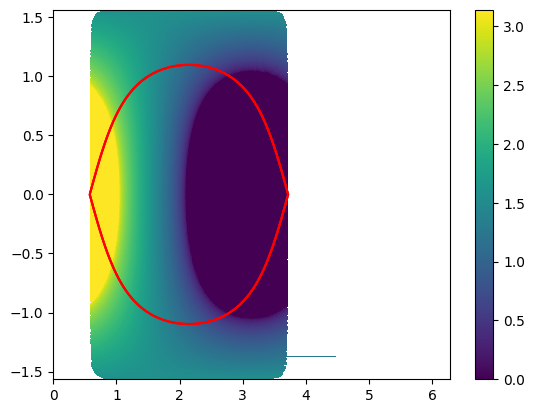

In [25]:
pc = plt.pcolormesh(l_arr, b_arr, psi_gc_arr)
plt.colorbar(pc)
for simplex in hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], 'r-')
plt.xlim(0, 2 * np.pi)

In [26]:
# Splitting to within and without
combo = np.dstack((l_arr, b_arr))
hull_path = Path( points[hull.vertices])
within_eq = np.array(
    [
        [
            psi_gc_arr[i][j] if hull_path.contains_point(combo[i][j])
            else -1.
            for j in range(len(psi_gc_arr[0]))
        ]
        for i in range(len(psi_gc_arr))
    ]
)
without_eq = np.array(
    [
        [
            psi_gc_arr[i][j] if not hull_path.contains_point(combo[i][j])
            else -1.
            for j in range(len(psi_gc_arr[0]))
        ]
        for i in range(len(psi_gc_arr))
    ]
)

/tmp/ipykernel_24667/3214543375.py:1: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  pc = plt.pcolormesh(l_arr, b_arr, without_eq)


(0.0, 6.283185307179586)

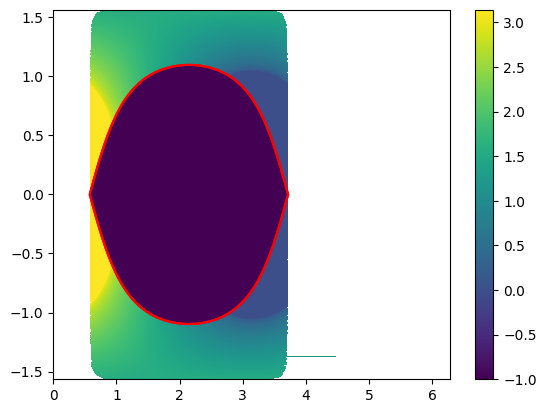

In [27]:
pc = plt.pcolormesh(l_arr, b_arr, without_eq)
plt.colorbar(pc)
for simplex in hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], 'r-')
plt.xlim(0, 2 * np.pi)

/tmp/ipykernel_24667/3943817094.py:1: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  pc = plt.pcolormesh(l_arr, b_arr, within_eq)


(0.0, 6.283185307179586)

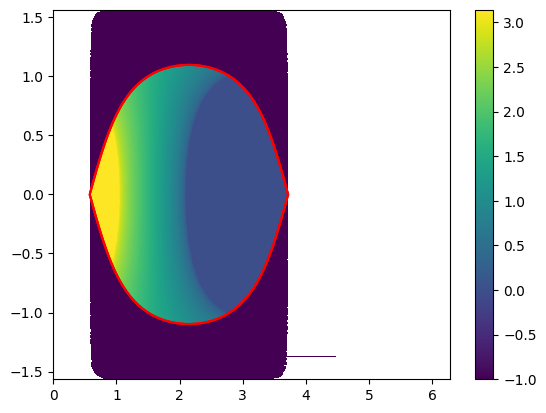

In [28]:
pc = plt.pcolormesh(l_arr, b_arr, within_eq)
plt.colorbar(pc)
for simplex in hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], 'r-')
plt.xlim(0, 2 * np.pi)

In [29]:
# The integrated versions NFW
int_arr = np.array([[
    np.trapz(opaca_nfw.halo.rho(
        r_obs_point(rhalo, psi_x)
    )**2, x=rhalo)
for psi_x in psi_y] for psi_y in psi_gc_arr])

int_arr_within = np.array([[
    np.trapz(opaca_nfw.halo.rho(
        r_obs_point(rhalo, psi_x)
    )**2, x=rhalo) if psi_x >= 0. else 0.
for psi_x in psi_y] for psi_y in within_eq])

int_arr_without = np.array([[
    np.trapz(opaca_nfw.halo.rho(
        r_obs_point(rhalo, psi_x)
    )**2, x=rhalo) if psi_x >= 0. else 0.
for psi_x in psi_y] for psi_y in without_eq])

/tmp/ipykernel_24667/1701985450.py:1: RuntimeWarning: divide by zero encountered in log10
  pc = plt.pcolormesh(l_arr, b_arr, np.log10(int_arr_within))
/tmp/ipykernel_24667/1701985450.py:1: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  pc = plt.pcolormesh(l_arr, b_arr, np.log10(int_arr_within))


(0.0, 6.283185307179586)

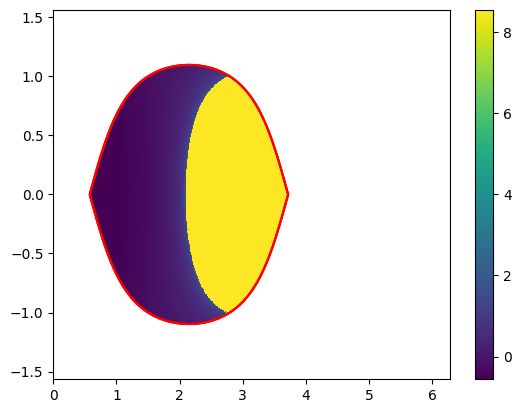

In [41]:
pc = plt.pcolormesh(l_arr, b_arr, np.log10(int_arr_within))
plt.colorbar(pc)
for simplex in hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], 'r-')
plt.xlim(0, 2 * np.pi)

/tmp/ipykernel_24667/1612886387.py:1: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  pc = plt.pcolormesh(l_arr, b_arr, int_arr_without)


(0.0, 6.283185307179586)

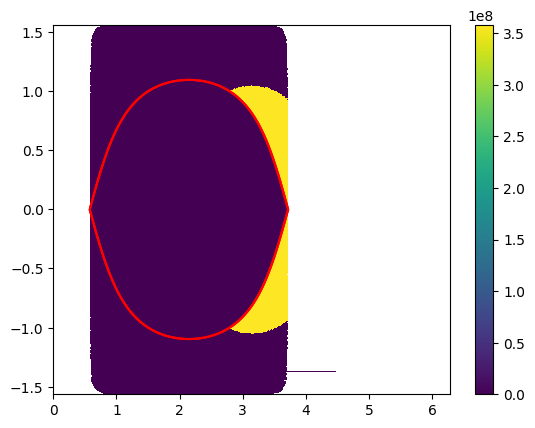

In [31]:
pc = plt.pcolormesh(l_arr, b_arr, int_arr_without)
plt.colorbar(pc)
for simplex in hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], 'r-')
plt.xlim(0, 2 * np.pi)

In [32]:
# Comparing averages, useful for point source studies.
print("NFW Profile ratio:")
total = np.sum(int_arr) / len(int_arr[int_arr > 0])
with_in = np.sum(int_arr_within) / len(int_arr_within[int_arr_within > 0])
without = np.sum(int_arr_without) / len(int_arr_without[int_arr_without > 0])
print("Within fraction: %.1f" % (with_in / total))
print("Without fraction: %.1f" % (without / total))

NFW Profile ratio:
Within fraction: 1.1
Without fraction: 0.6


In [33]:
# Setup for the integral
x_arr = (l_arr).flatten()
y_arr = b_arr.flatten()
total_flat = int_arr.flatten()
within_flat = int_arr_within.flatten()
without_flat = int_arr_without.flatten()
# Domain points
domain_points = np.array(list(zip(x_arr, y_arr)))
tri = Delaunay(domain_points)  # Delauny triangles

# Simple integral function
# Taken from https://stackoverflow.com/questions/63302504/2d-integration-of-scattered-data-python
def area_from_3_points(x, y, z):
    return np.sqrt(np.sum(np.cross(x-y, x-z), axis=-1)**2) / 2

In [34]:
# Integration
integral_total = 0
for vertices in tqdm(tri.simplices):
    mean_value = (total_flat[vertices[0]] + total_flat[vertices[1]] + total_flat[vertices[2]]) / 3
    area = area_from_3_points(domain_points[vertices[0]], domain_points[vertices[1]], domain_points[vertices[2]])
    integral_total += mean_value * area
print("Total:")
print(integral_total)

integral_within = 0
for vertices in tqdm(tri.simplices):
    mean_value = (within_flat[vertices[0]] + within_flat[vertices[1]] + within_flat[vertices[2]]) / 3
    area = area_from_3_points(domain_points[vertices[0]], domain_points[vertices[1]], domain_points[vertices[2]])
    integral_within += mean_value * area
print("Within:")
print(integral_within)

integral_without = 0
for vertices in tqdm(tri.simplices):
    mean_value = (without_flat[vertices[0]] + without_flat[vertices[1]] + without_flat[vertices[2]]) / 3
    area = area_from_3_points(domain_points[vertices[0]], domain_points[vertices[1]], domain_points[vertices[2]])
    integral_without += mean_value * area
print("Without:")
print(integral_without)

  0%|          | 0/716364 [00:00<?, ?it/s]

Total:
1069807313.6763084


  0%|          | 0/716364 [00:00<?, ?it/s]

Within:
818258798.763112


  0%|          | 0/716364 [00:00<?, ?it/s]

Without:
251548514.91320133


In [35]:
print("NFW Profile ratio:")
print("Within fraction: %.2f" % (integral_within / integral_total))
print("Without fraction: %.2f" % (integral_without / integral_total))

NFW Profile ratio:
Within fraction: 0.76
Without fraction: 0.24


In [1]:
1 / 0.76

1.3157894736842106

In [7]:
0.24 * 3.6

0.864

In [36]:
# The integrated versions Burkert
int_arr_bur = np.array([[
    np.trapz(opaca_bur.halo.rho(
        r_obs_point(rhalo, psi_x)
    )**2, x=rhalo)
for psi_x in psi_y] for psi_y in psi_gc_arr])

int_arr_within_bur = np.array([[
    np.trapz(opaca_bur.halo.rho(
        r_obs_point(rhalo, psi_x)
    )**2, x=rhalo) if psi_x >= 0. else 0.
for psi_x in psi_y] for psi_y in within_eq])

int_arr_without_bur = np.array([[
    np.trapz(opaca_bur.halo.rho(
        r_obs_point(rhalo, psi_x)
    )**2, x=rhalo) if psi_x >= 0. else 0.
for psi_x in psi_y] for psi_y in without_eq])

In [37]:
# Setup for the integral
total_flat_bur = int_arr_bur.flatten()
within_flat_bur = int_arr_within_bur.flatten()
without_flat_bur = int_arr_without_bur.flatten()

In [38]:
# Integration
integral_total_bur = 0
for vertices in tqdm(tri.simplices):
    mean_value = (total_flat_bur[vertices[0]] + total_flat_bur[vertices[1]] + total_flat_bur[vertices[2]]) / 3
    area = area_from_3_points(domain_points[vertices[0]], domain_points[vertices[1]], domain_points[vertices[2]])
    integral_total_bur += mean_value * area
print("Total:")
print(integral_total_bur)

integral_within_bur = 0
for vertices in tqdm(tri.simplices):
    mean_value = (within_flat_bur[vertices[0]] + within_flat_bur[vertices[1]] + within_flat_bur[vertices[2]]) / 3
    area = area_from_3_points(domain_points[vertices[0]], domain_points[vertices[1]], domain_points[vertices[2]])
    integral_within_bur += mean_value * area
print("Within:")
print(integral_within_bur)

integral_without_bur = 0
for vertices in tqdm(tri.simplices):
    mean_value = (without_flat_bur[vertices[0]] + without_flat_bur[vertices[1]] + without_flat_bur[vertices[2]]) / 3
    area = area_from_3_points(domain_points[vertices[0]], domain_points[vertices[1]], domain_points[vertices[2]])
    integral_without_bur += mean_value * area
print("Without:")
print(integral_without_bur)

  0%|          | 0/716364 [00:00<?, ?it/s]

Total:
43.27111462122256


  0%|          | 0/716364 [00:00<?, ?it/s]

Within:
30.729078692170145


  0%|          | 0/716364 [00:00<?, ?it/s]

Without:
12.542035929050819


In [39]:
print("Burket Profile ratio:")
print("Within fraction: %.2f" % (integral_within_bur / integral_total_bur))
print("Without fraction: %.2f" % (integral_without_bur / integral_total_bur))

Burket Profile ratio:
Within fraction: 0.71
Without fraction: 0.29


In [8]:
2.2**2

4.840000000000001

In [3]:
np.sqrt(6.35)

NameError: name 'np' is not defined